# ASSIGNMENT 17 : SUPPORT VECTOR MACHINE

#### Task 1: Exploratory Data Analysis (EDA)
##### 1. Load the Mushroom dataset and perform fundamental data exploration.

In [532]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [534]:
df = pd.read_csv(r"F:\Data science Course by ExcelR\ASSIGNMENTS\17. SVM\mushroom.csv")
df.head()

Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat      class stalk_height  \
0  sheathing         chocolate  clustered    waste  poisonous    14.276173   
1  sheathing             brown   numerous    waste     edible     3.952715   
2  sheathing            purple   abundant    waste  poisonous     9.054265   
3   cobwebby             green  clustered  grasses  poisonous     5.226499   
4       none            yellow  clustered    urban  poisonous    14.037532   

  cap_diameter  
0     5.054983  
1    19.068319  
2     7.205884  
3    20.932692  
4    12.545245  

[5 rows x 26 columns]

In [535]:
df.shape

(2000, 26)

we have 2000 records and 26 columns.

In [539]:
df.columns

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

* Above is the name of all the columns
* We can see there is some inconsistencies in the column names 
* We need to rename the first column name

In [542]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

* All of the columns seems to be of object type except first and last 2 columns.
* We have only 3 numerical columns
* We have 23 objec columns

In [545]:
df.describe().T

count        mean         std  min         25%         50%  \
Unnamed: 0    2000.0  624.974000  375.091938  0.0  290.000000  607.000000   
stalk_height  2000.0    8.449118    3.697217  2.0    5.291009    8.318596   
cap_diameter  2000.0   12.314345    7.048845  1.0    5.723521   12.124902   

                     75%          max  
Unnamed: 0    957.250000  1279.000000  
stalk_height   11.781272    15.095066  
cap_diameter   18.698605    25.000054

* There doesn't seems to be any null values for the above columns
* values seems to be heavily skewed

In [548]:
# Let's look for any null values in the data set
df.isnull().sum().sum()

0

* There doesn't seems to be any null values in the dataset.

In [551]:
# let's check for any duplicate values in the dataset
df.duplicated().sum()

1024

We have a lot of duplicates in this dataset.

In [554]:
# print(df.shape)
# df.drop_duplicates(inplace=True)
# print(df.shape)

Our model performed better without removing duplicated so we'll be retaining them

In [557]:
# Let's look for number of unique values in each column to figure out what is the name of our first column

df.nunique()

Unnamed: 0                  976
cap_shape                     5
cap_surface                   4
cap_color                     9
bruises                       2
odor                          9
gill_attachment               4
gill_spacing                  3
gill_size                     2
gill_color                   12
stalk_shape                   2
stalk_root                    7
stalk_surface_above_ring      4
stalk_surface_below_ring      4
stalk_color_above_ring        9
stalk_color_below_ring        9
veil_type                     2
veil_color                    4
ring_number                   3
ring_type                     8
spore_print_color             9
population                    6
habitat                       7
class                         2
stalk_height                973
cap_diameter                976
dtype: int64

* The first column Unnamed seems to be an id give to record the mushroom so we'll be removing it when we do feature engineering since it do not contribute to the model performance.

##### 2.	Utilize histograms, box plots, or density plots to understand feature distributions.

In [561]:
#let's separate the numerical columns and object columns
obj_cols, num_cols = [], []

for col in df.columns:
    if df[col].dtype == 'object':
        obj_cols.append(col)
    else:
        num_cols.append(col)

obj_cols, num_cols

(['cap_shape',
  'cap_surface',
  'cap_color',
  'bruises',
  'odor',
  'gill_attachment',
  'gill_spacing',
  'gill_size',
  'gill_color',
  'stalk_shape',
  'stalk_root',
  'stalk_surface_above_ring',
  'stalk_surface_below_ring',
  'stalk_color_above_ring',
  'stalk_color_below_ring',
  'veil_type',
  'veil_color',
  'ring_number',
  'ring_type',
  'spore_print_color',
  'population',
  'habitat',
  'class'],
 ['Unnamed: 0', 'stalk_height', 'cap_diameter'])

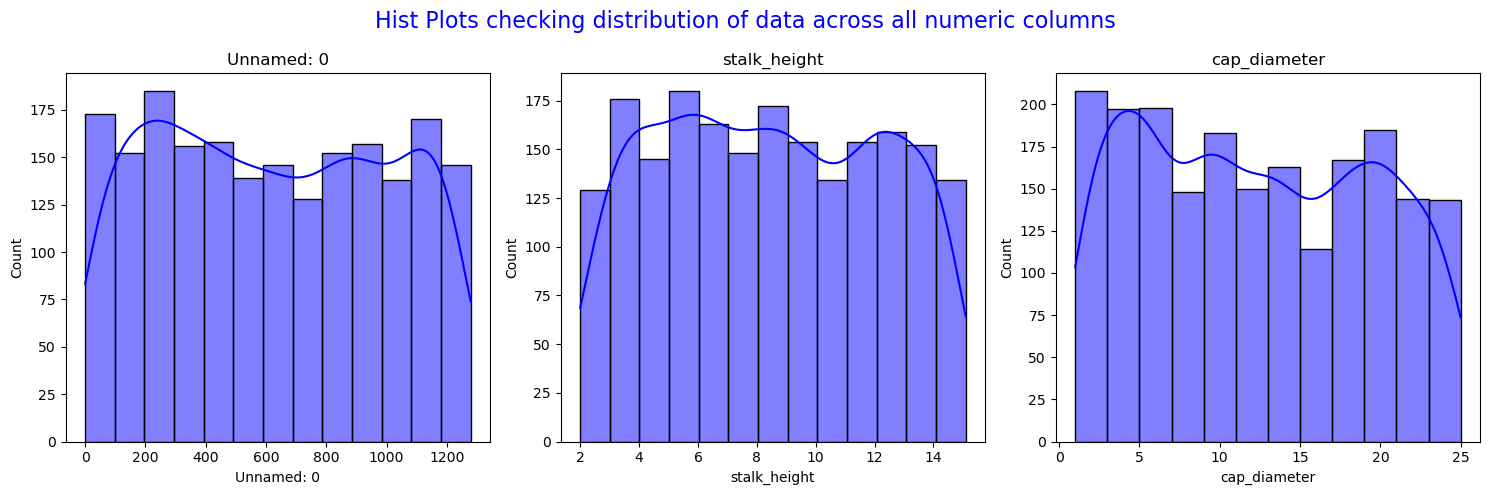

In [563]:
# Let's Visualize all the numerical columns using histplot to understand the distribution of data

plt.figure(figsize=(15,5))        #setting up figure size
index = 1                          #set index to 1
for col in num_cols:         #looping through all the columns one by one except the first categorical column
    plt.subplot(1, 3, index)       #creating subplot
    sns.histplot(x=df[col], color='blue', kde=True)         # creating histplot inside each subplot 
    index += 1                     #increse the index for subplot
    plt.title(f'{col}')
plt.suptitle("Hist Plots checking distribution of data across all numeric columns", fontsize=16, color='blue')
plt.tight_layout()                 #used for avoiding overlapping 
plt.show()                         #showing the figure

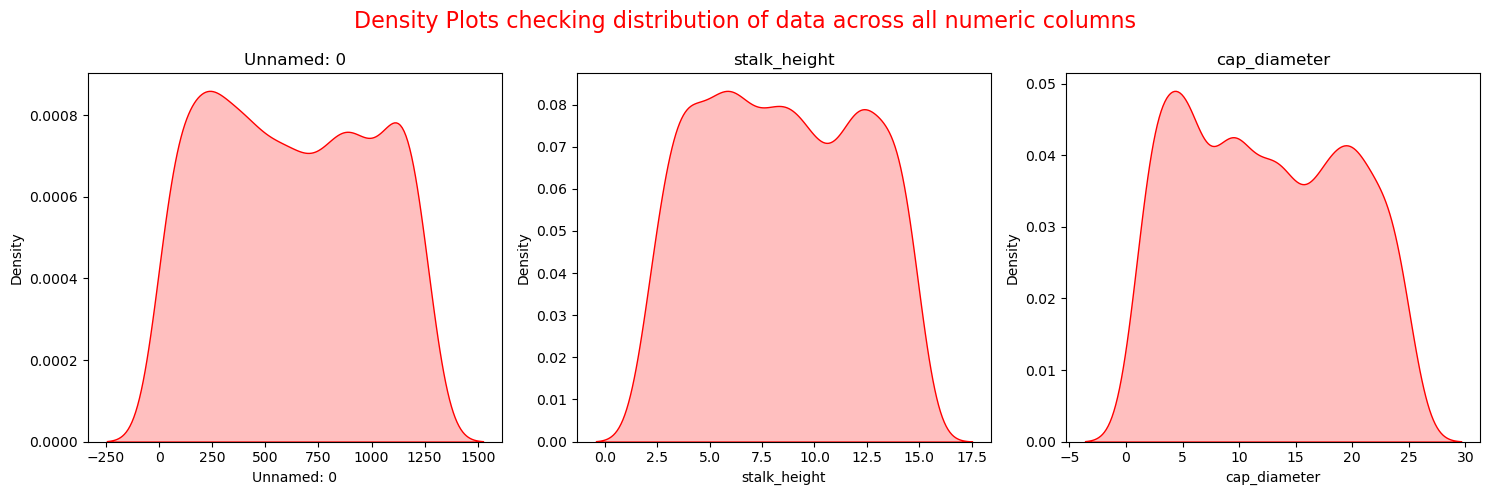

In [565]:
# Let's see the density plot and confirm the above distributions

plt.figure(figsize=(15,5))        #setting up figure size
index = 1                          #set index to 1
for col in num_cols:         #looping through all the columns one by one except the first column
    plt.subplot(1, 3, index)       #creating subplot
    sns.kdeplot(x=df[col], color='red', fill=True)         # creating density plot inside each subplot 
    index += 1                     #increse the index for subplot
    plt.title(f'{col}')            #setting up title
plt.suptitle("Density Plots checking distribution of data across all numeric columns", fontsize=16, color='red')
plt.tight_layout()                 #used for avoiding overlapping 
plt.show()                         #showing the figure

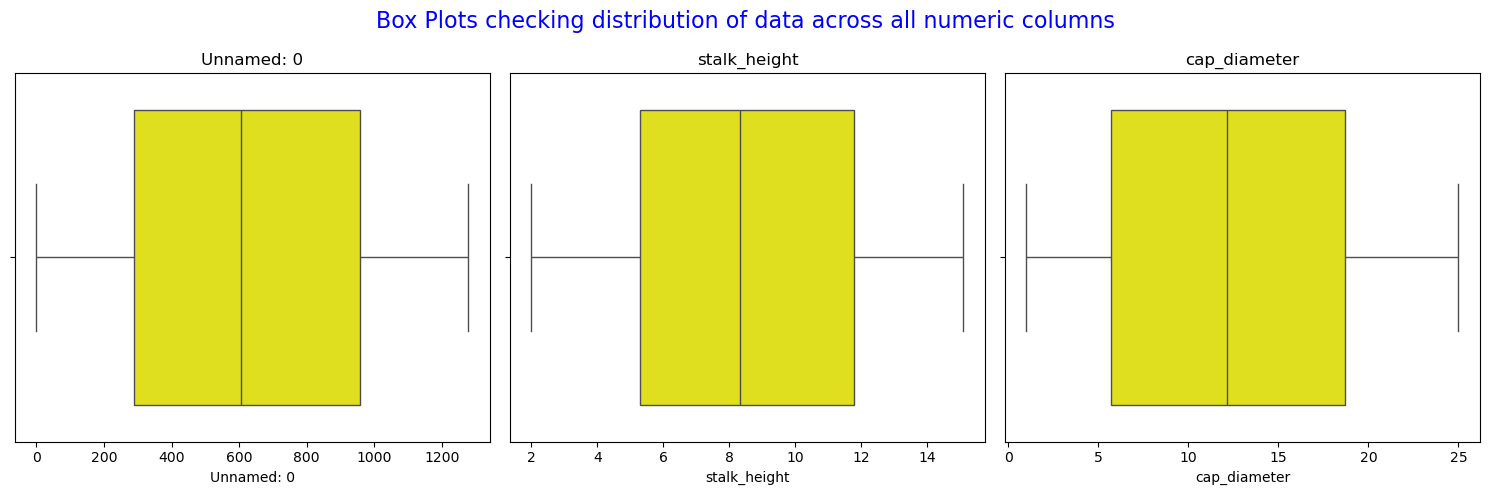

In [566]:
# Let's create boxplot and check if there is anu outlier

plt.figure(figsize=(15,5))        #setting up figure size
index = 1                          #set index to 1
for col in num_cols:         #looping through all the columns one by one except the first column
    plt.subplot(1, 3, index)       #creating subplot
    sns.boxplot(x=df[col], color='yellow')         # creating boxplot plot inside each subplot 
    index += 1                     #increse the index for subplot
    plt.title(f'{col}')            #setting up title
plt.suptitle("Box Plots checking distribution of data across all numeric columns", fontsize=16, color='blue')
plt.tight_layout()                 #used for avoiding overlapping 
plt.show()                         #showing the figure

Based on all the above plots we can say:
* All the columns are distributed in a stable manner we don't seem to have any spikes in the numerical column.
* There doesn't seem to have any outliers either in this dataset.

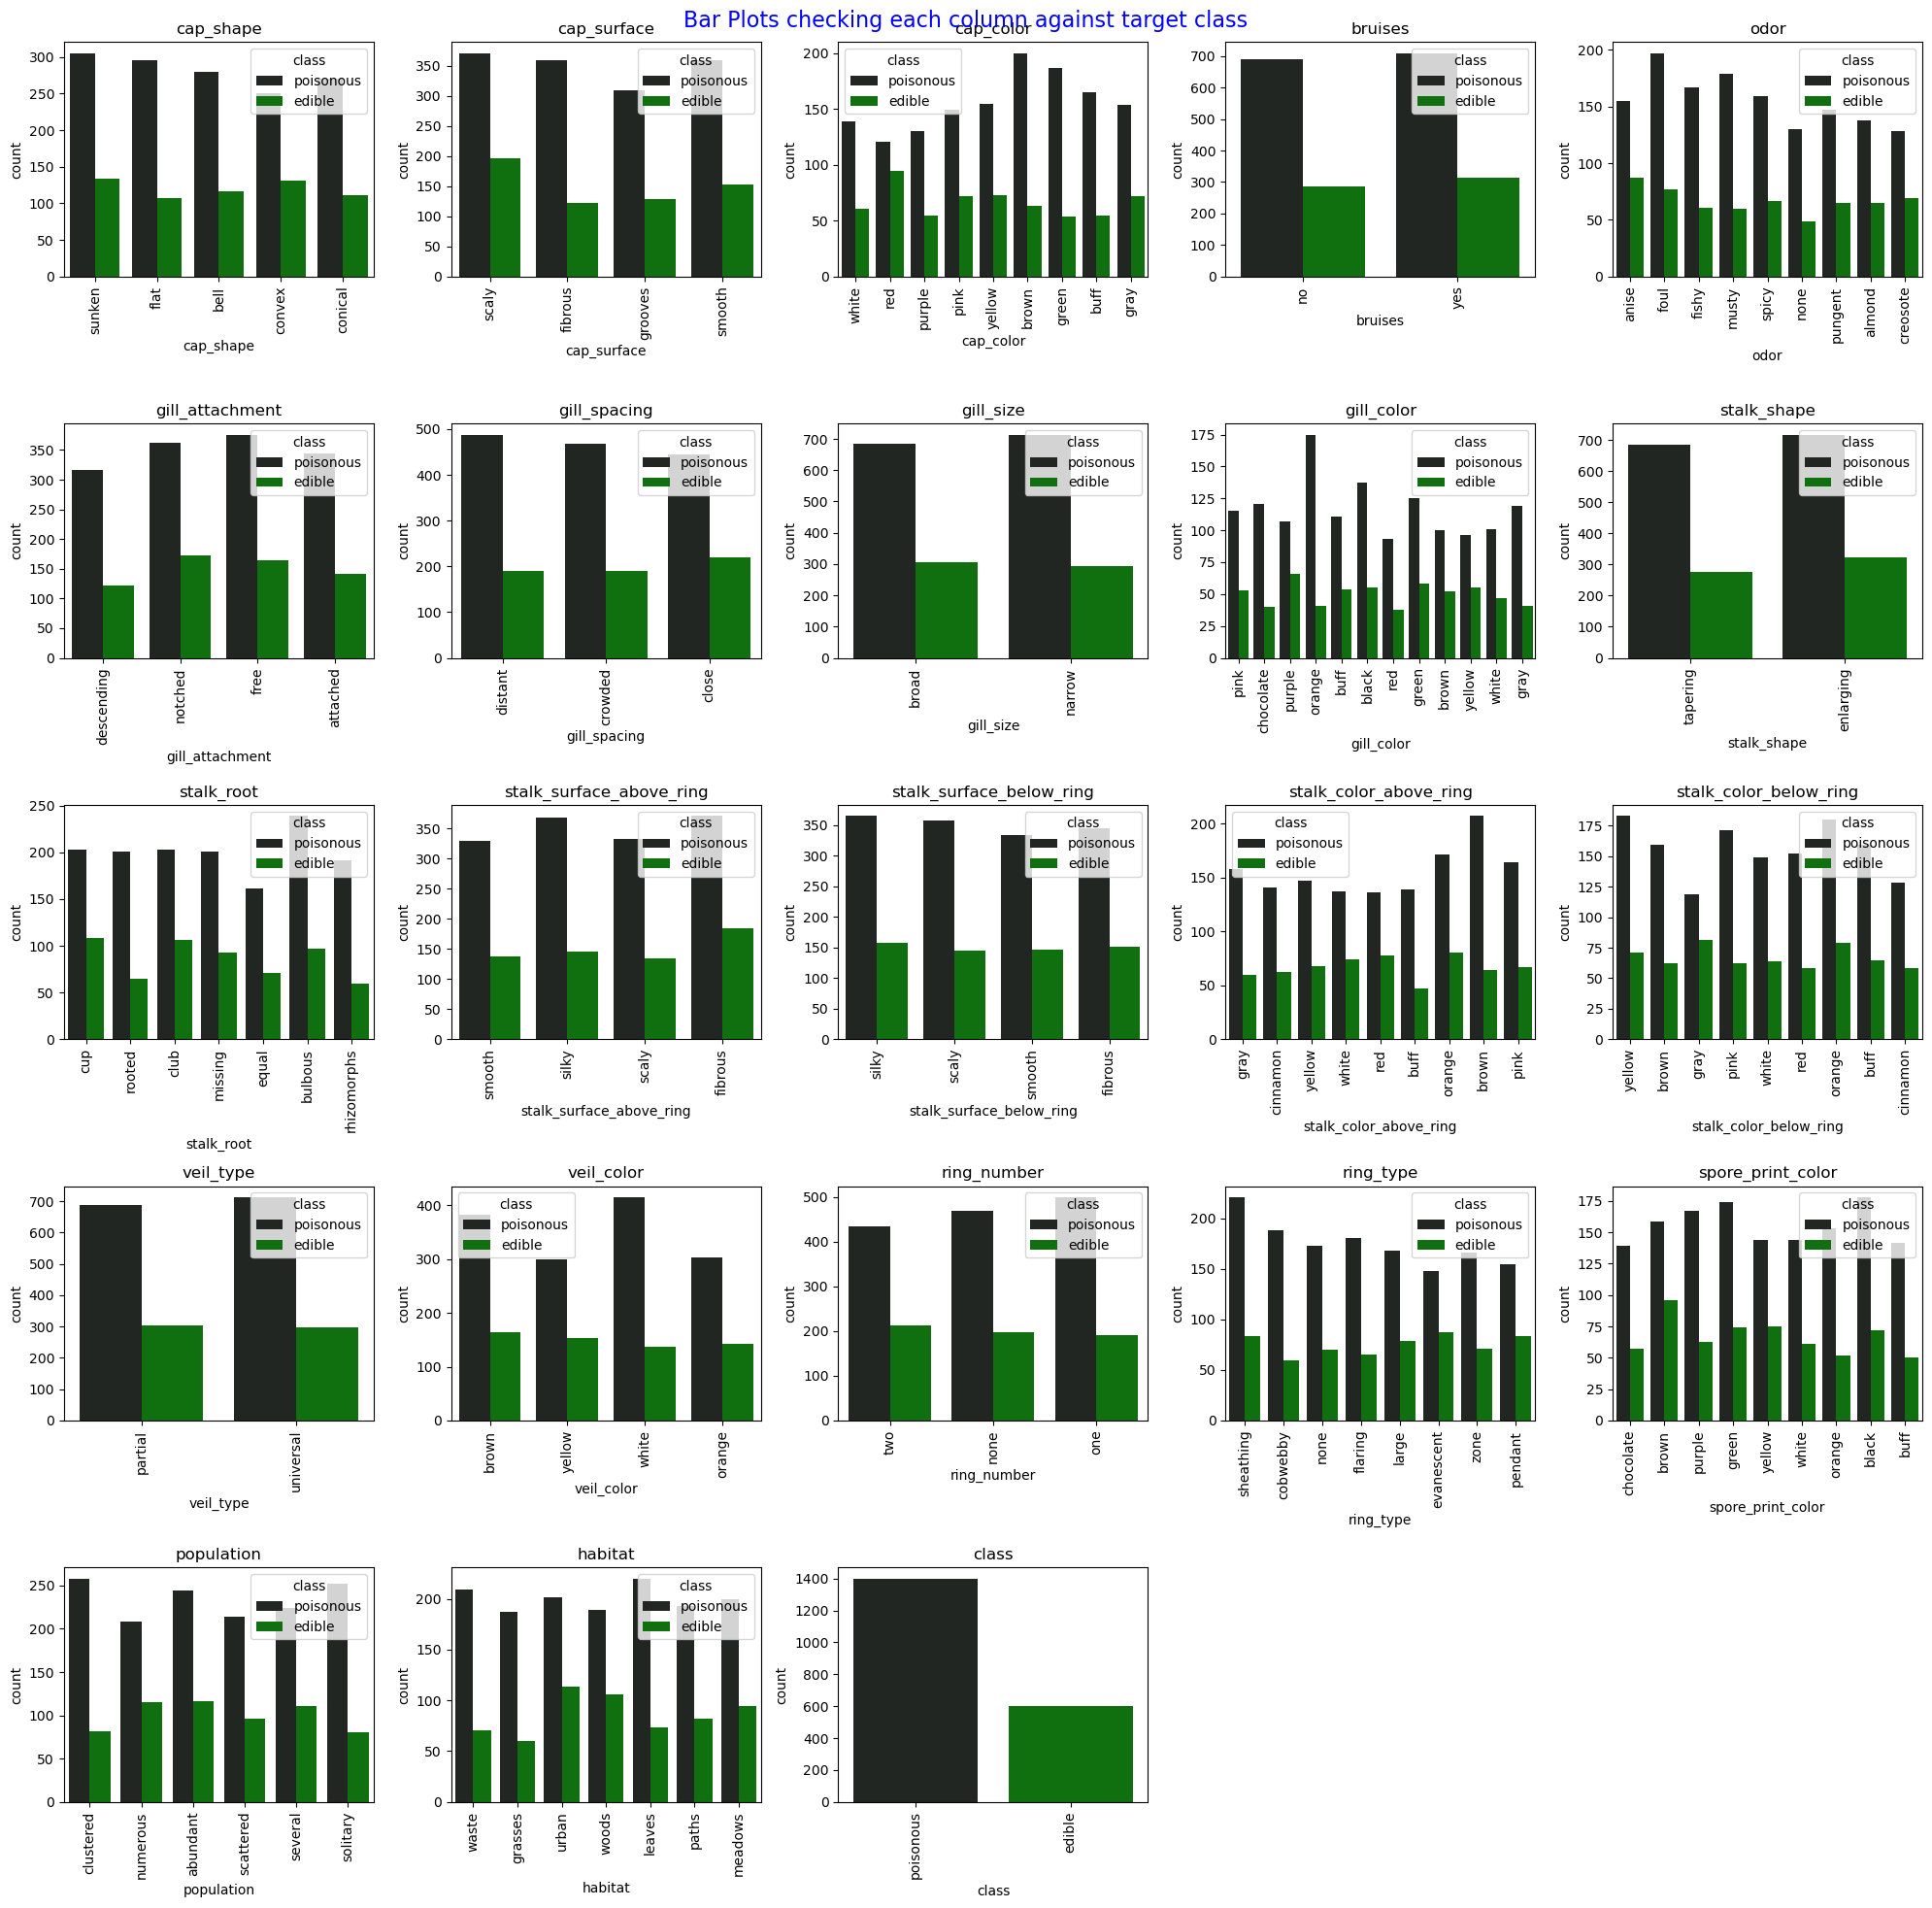

In [572]:
#Let's plot a cout plot for all the categorical columns

plt.figure(figsize=(20,20))        #setting up figure size
index = 1                          #set index to 1
for col in obj_cols:               #looping through all the columns one by one except the first column
    plt.subplot(5, 5, index)       #creating subplot
    sns.countplot(x=df[col], color='green', hue=df['class'])         # creating barplot inside each subplot 
    index += 1                     #increse the index for subplot
    plt.title(f'{col}')            #setting up title
    plt.xticks(rotation=90)
plt.suptitle("Bar Plots checking each column against target class", fontsize=16, color='blue')
plt.tight_layout()                 #used for avoiding overlapping 
plt.show()                         #showing the figure

##### 3. Investigate feature correlations to discern relationships within the data.

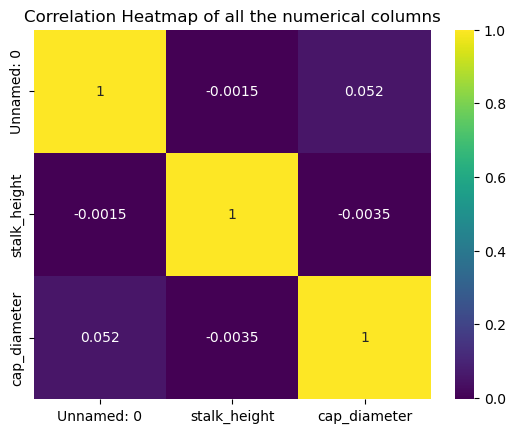

In [575]:
#Let's find if there is any correlation between numerical columns

sns.heatmap(df.corr(numeric_only=True), annot=True, cbar=True, cmap='viridis')
plt.title("Correlation Heatmap of all the numerical columns")
plt.show()

* Numerical columns don't seems to be highly correlated

#### Task 2: Data Preprocessing
##### 1. Encode categorical variables if necessary.

In [579]:
# We'll be using label encoder for all the objective columns
from sklearn.preprocessing import LabelEncoder

for col in obj_cols:    
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [581]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   int32  
 2   cap_surface               2000 non-null   int32  
 3   cap_color                 2000 non-null   int32  
 4   bruises                   2000 non-null   int32  
 5   odor                      2000 non-null   int32  
 6   gill_attachment           2000 non-null   int32  
 7   gill_spacing              2000 non-null   int32  
 8   gill_size                 2000 non-null   int32  
 9   gill_color                2000 non-null   int32  
 10  stalk_shape               2000 non-null   int32  
 11  stalk_root                2000 non-null   int32  
 12  stalk_surface_above_ring  2000 non-null   int32  
 13  stalk_surface_below_ring  2000 non-null   int32  
 14  stalk_co

* We can see now all the object columns are converted to numerical.

In [584]:
# let's do feature extraction before splitting the data for training and testing set.
x = df.drop(['Unnamed: 0','class'], axis=1)    # Features
y = df['class']                               # Target
x.shape, y.shape

((2000, 24), (2000,))

##### 2. Split the dataset into training and testing sets.

In [587]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1600, 24), (400, 24), (1600,), (400,))

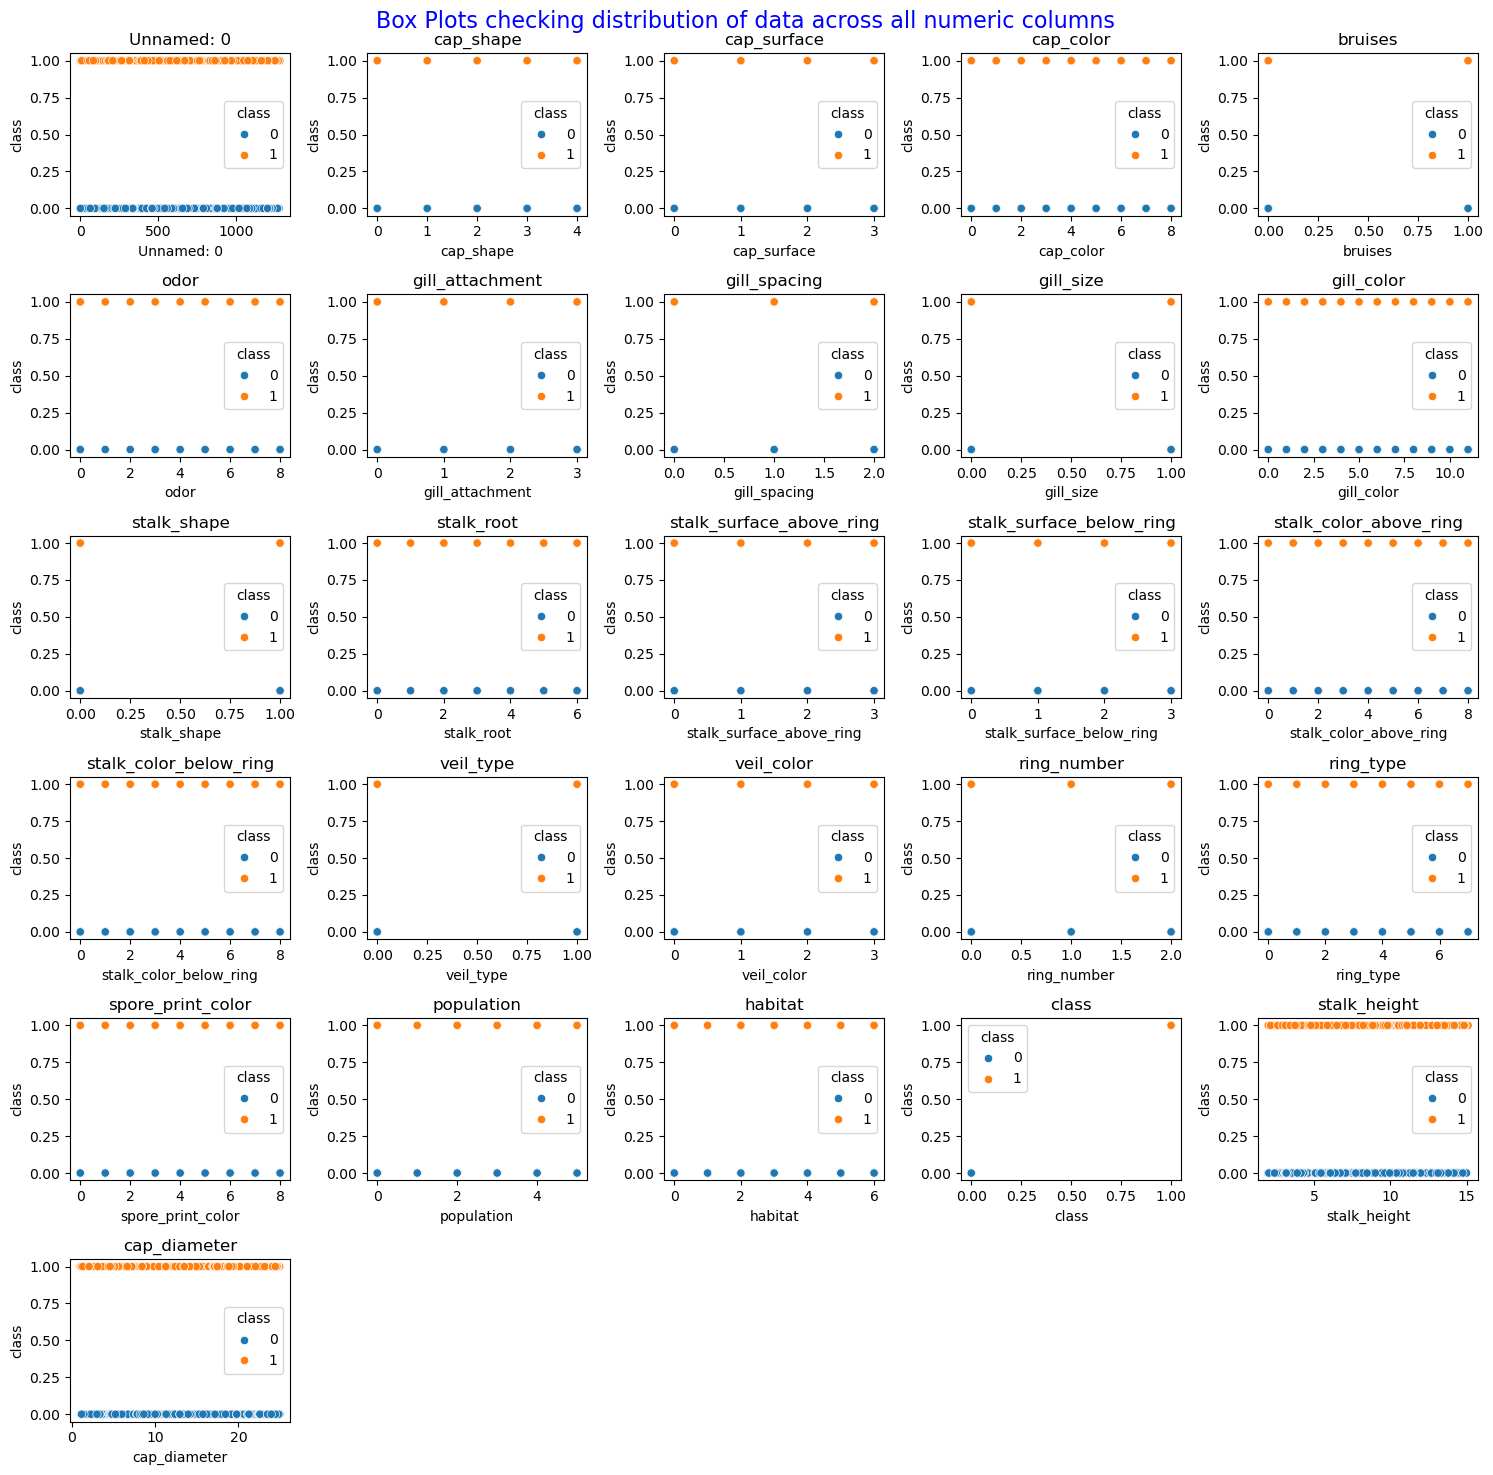

In [589]:
# Let's create boxplot and check if there is anu outlier

plt.figure(figsize=(15,15))        #setting up figure size
index = 1                          #set index to 1
for col in df.columns:         #looping through all the columns one by one except the first column
    plt.subplot(6, 5, index)       #creating subplot
    sns.scatterplot(x=df[col],y=df['class'],hue=df['class'])         # creating boxplot plot inside each subplot 
    index += 1                     #increse the index for subplot
    plt.title(f'{col}')            #setting up title
plt.suptitle("Box Plots checking distribution of data across all numeric columns", fontsize=16, color='blue')
plt.tight_layout()                 #used for avoiding overlapping 
plt.show()                         #showing the figure

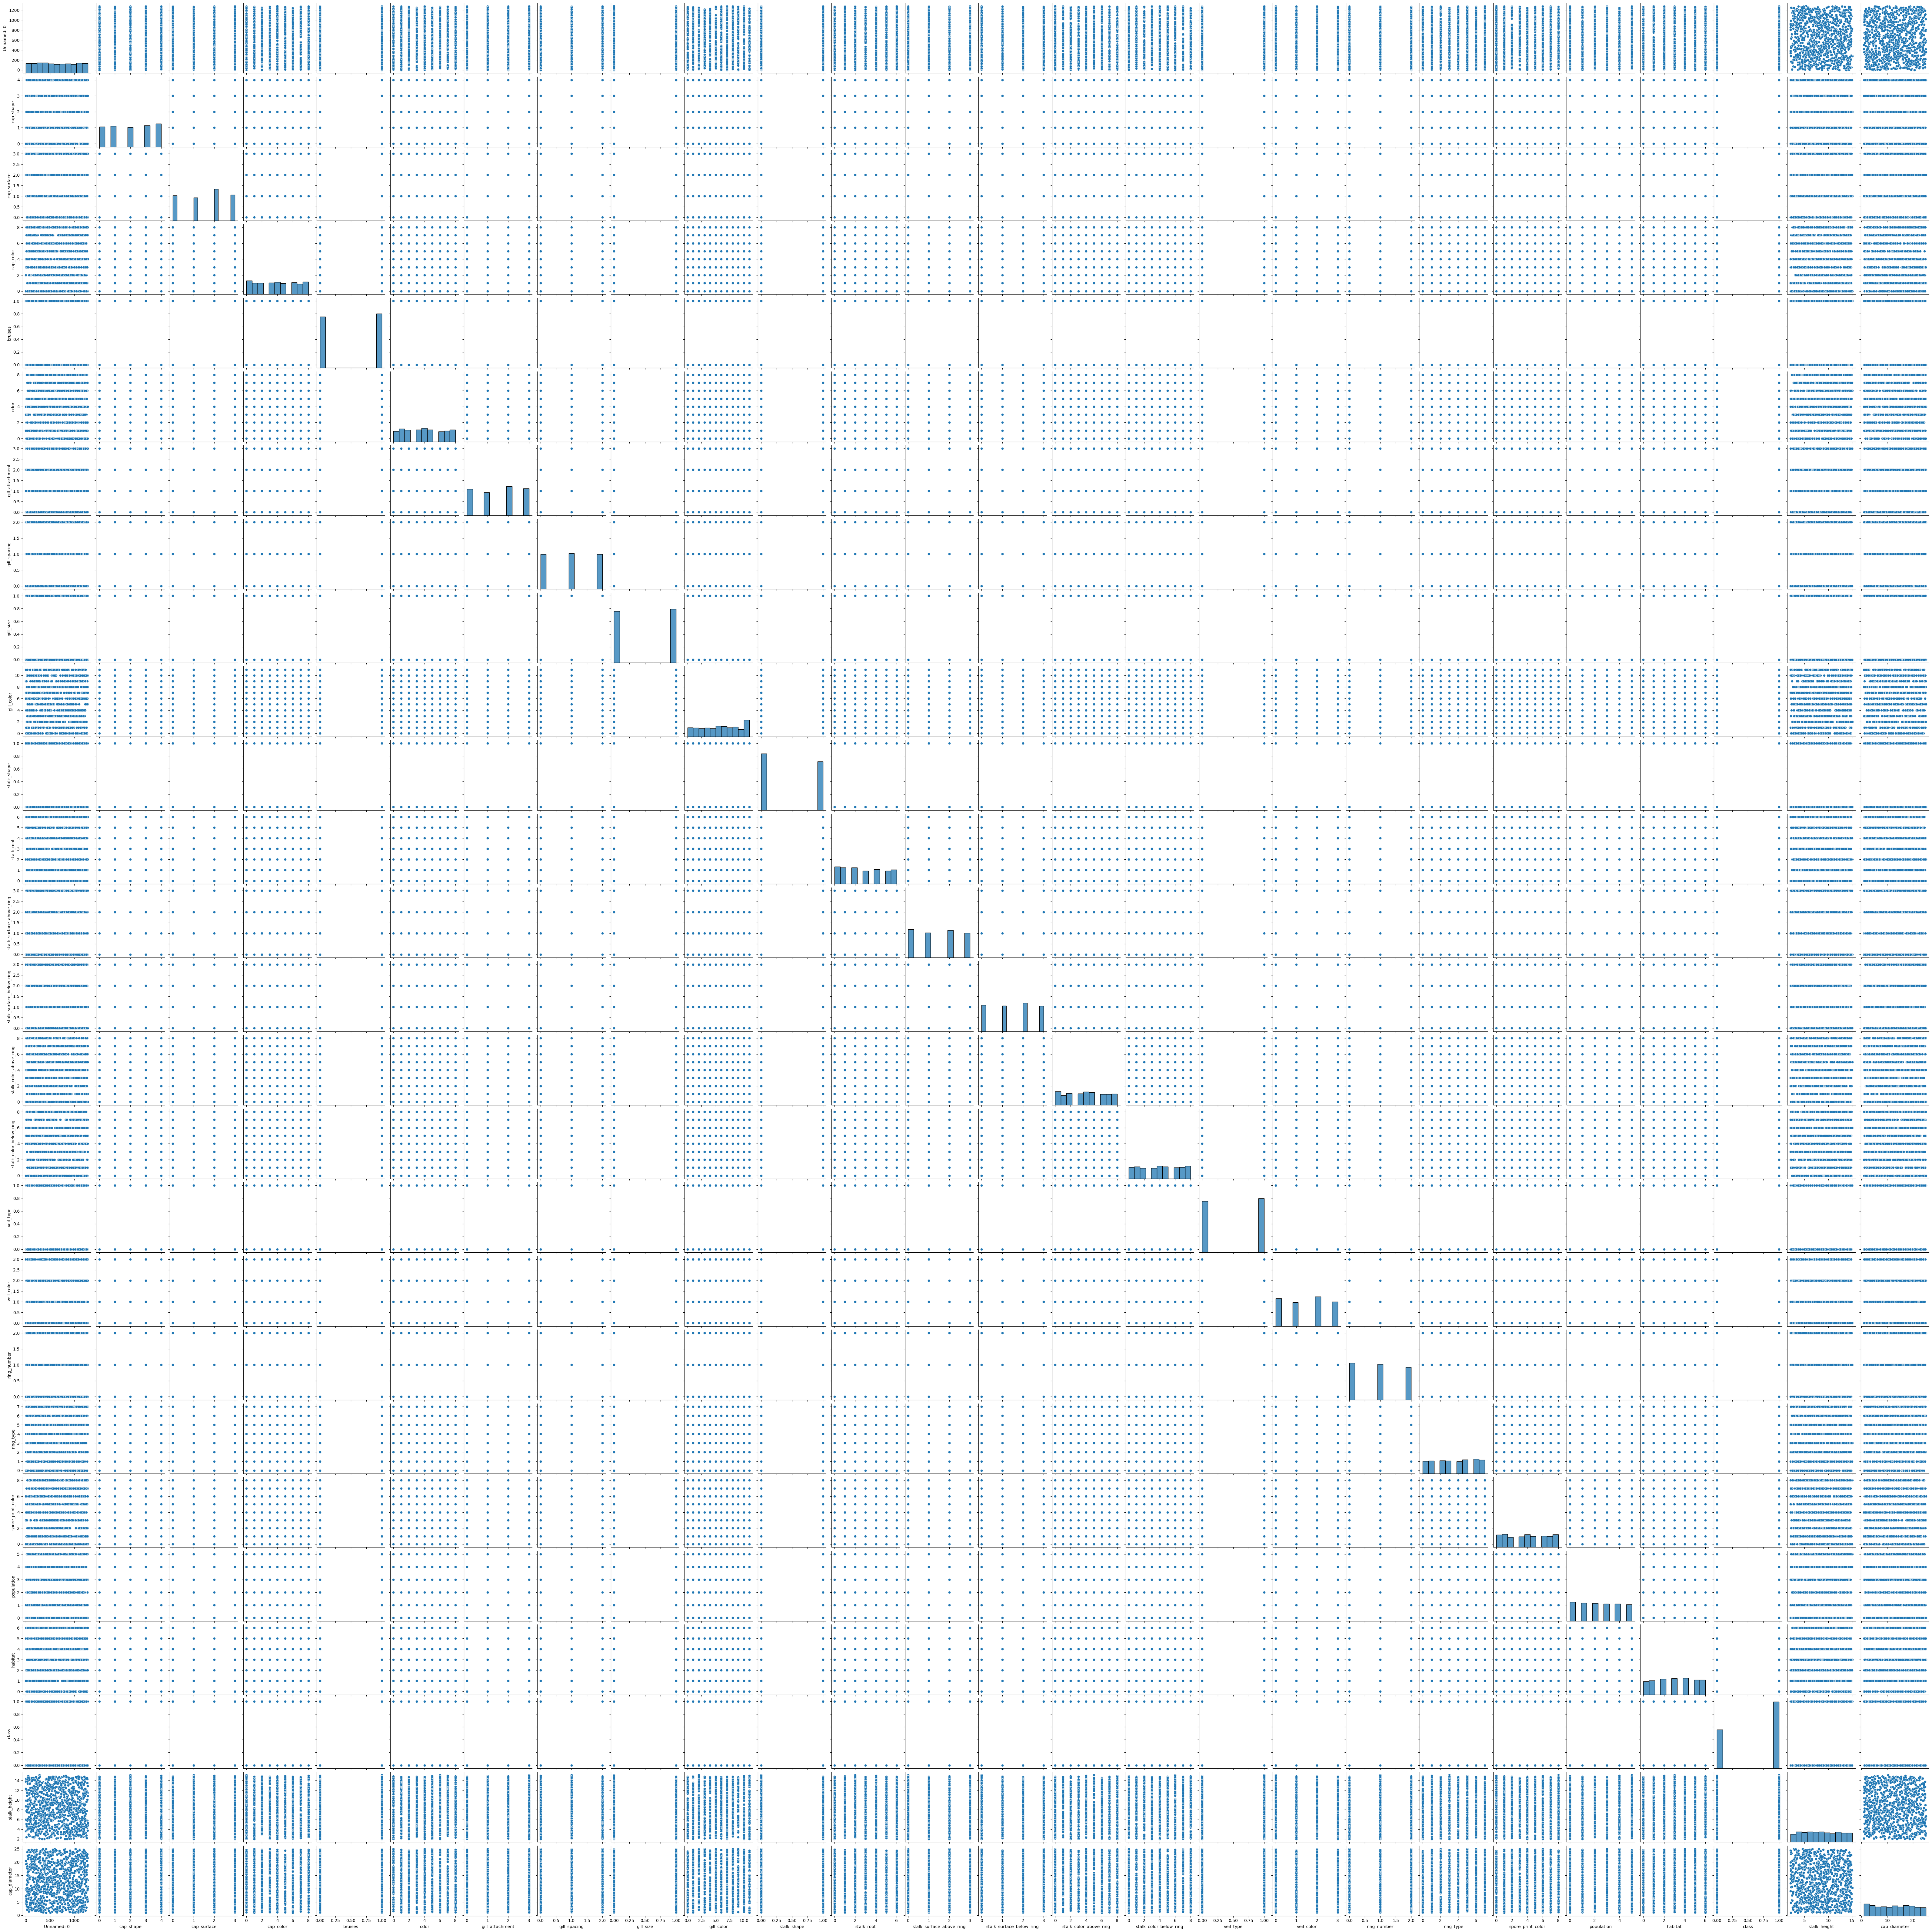

In [182]:
#Getting pari plot of all the columns 

sns.pairplot(df)

* We can see most of the columns are linear in nature

##### 2.	Visualize class distributions to gauge dataset balance or imbalance.


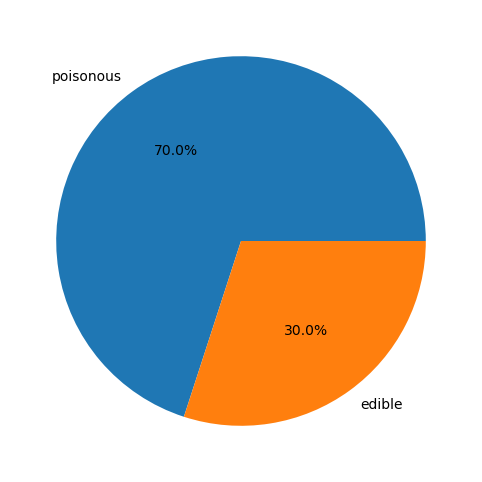

In [591]:
#Let's create a pieplot of class column and see if the class is balanced for all the types of mushrooms
plt.figure(figsize=(8,6))
plt.pie(df['class'].value_counts(), autopct='%2.1f%%', labels=['poisonous','edible'])
plt.show()

* We can see there is a imbalance in the target class.

#### Task 4: SVM Implementation
##### 1. Implement a basic SVM classifier using Python libraries like scikit-learn.


In [596]:
from sklearn.svm import SVC

model = SVC()
model

SVC()

##### 2.	Train the SVM model on the training data.

In [599]:
model.fit(x_train, y_train)

SVC()

##### 3. Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

In [602]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(x_test)
print("Accuracy Score on Test Data is : ",accuracy_score(y_pred, y_test))
print("Recall Score on Test Data is : ",recall_score(y_pred, y_test))
print("Precision Score on Test Data is : ",precision_score(y_pred, y_test))
print("F1 Score on Test Data is : ",f1_score(y_pred, y_test))

Accuracy Score on Test Data is :  0.6675
Recall Score on Test Data is :  0.6675
Precision Score on Test Data is :  1.0
F1 Score on Test Data is :  0.800599700149925


#### Task 5: Visualization of SVM Results
##### 1.	Visualize classification results on the testing data.

In [605]:
#Let's get the classification report and then vosualize the result by displaying confusion matrix
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.67      0.80       400

    accuracy                           0.67       400
   macro avg       0.50      0.33      0.40       400
weighted avg       1.00      0.67      0.80       400



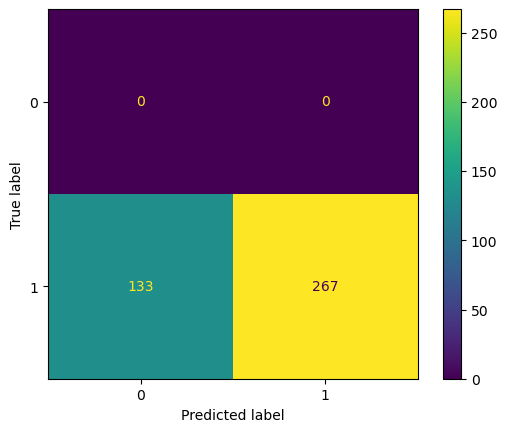

In [607]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_pred, y_test)
cmd = ConfusionMatrixDisplay(confusion_matrix = cm)
cmd.plot()
plt.show()

#### Task 6: Parameter Tuning and Optimization
##### 1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.


In [610]:
#Building experimental SVC models

model1 = SVC(kernel='linear', C = 0.1)
model1.fit(x_train, y_train)

print("Model1 Accuracy",accuracy_score(model1.predict(x_test), y_test))

Model1 Accuracy 0.6675


In [612]:
#Building experimental SVC models

model2 = SVC(kernel='poly', C = 0.1, gamma=0.1)
model2.fit(x_train, y_train)

print("Model2 Accuracy",accuracy_score(model2.predict(x_test), y_test))

Model2 Accuracy 0.8625


In [614]:
#Building experimental SVC models

model3 = SVC(kernel='rbf', C = 0.1, gamma=0.1,class_weight='balanced')
model3.fit(x_train, y_train)

print("Model3 Accuracy",accuracy_score(model3.predict(x_test), y_test))

Model3 Accuracy 0.69


In [616]:
#Building experimental SVC models

model4 = SVC(kernel='sigmoid', C = 0.1, gamma=0.1)
model4.fit(x_train, y_train)

print("Model4 Accuracy",accuracy_score(model4.predict(x_test), y_test))

Model4 Accuracy 0.6675


In [618]:
#Building experimental SVC models

model5 = SVC(kernel='linear', C = 0.3)
model5.fit(x_train, y_train)

print("Model5 Accuracy",accuracy_score(model5.predict(x_test), y_test))

Model5 Accuracy 0.6675


In [620]:
#Building experimental SVC models

model6 = SVC(kernel='poly', C = 0.01, gamma='auto')
model6.fit(x_train, y_train)

print("Model6 Accuracy",accuracy_score(model6.predict(x_test), y_test))

Model6 Accuracy 0.8075


* SVC with 'rbf' performs better with balanced class weight.
* The best performing model is SVC with 'poly', C=0.1 and gamma=0.1
* 'rbf' does not need balanced class to perfrom better

#### Task 7: Comparison and Analysis
##### 1. Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).


* SVC(kernel='linear', C = 0.1) : Accuracy 0.6675
* **SVC(kernel='poly', C = 0.1, gamma=0.1) : Accuracy 0.8625**
* SVC(kernel='rbf', C = 0.1, gamma=0.1,class_weight='balanced') : Accuracy 0.69
* SVC(kernel='sigmoid', C = 0.1, gamma=0.1) : Accuracy 0.6675
* SVC(kernel='linear', C = 0.3, gamma=0.3) : Accuracy 0.6675
* SVC(kernel='poly', C = 0.01, gamma='auto') : Accuracy 0.8075
* **The best model is SVC with kernel as 'poly', the other parameters didn't change the result a lot**

##### 2. Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

**Strengths**
* SVM handles the nonlinear data well
* Effective in highdimentional spaces
* Robust to outliers
* Clear Margins
* Performed well for 'poly' kernel

**Weaknesses**
* Computational complexity
* Categorical data encoding
* Sensitive to hyperparameters
* Scalability issue
* Class imbalanced
* Feature Importance

##### 3.	Discuss practical implications of SVM in real-world classification tasks.

**Practical Use Cases**
* Healthcare :  Could be used for cancer detection or disease prediction using binary classification
* Finance : Fraud Detection and Credit Risk Assessment
* Text and Document Classification : Spam Filtering, Sentiment Analysis
* Image Recognition : Face Detection and Object Classification


**Other Advantages of SVM**
* High Accuracy
* Versatility Across Domains
* Robustness to overfitting
* Non-Linear Decision Boundaries